In [ ]:
import pandas as pd

In [ ]:
renda_geral = pd.read_excel("/content/drive/MyDrive/dados_renda_2019.xlsx", sheet_name="RDPC (Trab hab+Outros efetivo)", skiprows=13)

In [ ]:
renda = renda_geral.loc[(renda_geral["Nível territorial"] == "Unidade da Federação") &
                        (renda_geral["ind"] == "Rendimento médio mensal real domiciliar per capita, a preços médios do ano") &
                        (renda_geral["sub.classe"] == "Total") &
                        (renda_geral["Unid"] == "(R$)")].filter(items=["Abertura geográfica", 2019])

In [ ]:
renda.shape

(27, 2)

In [ ]:
renda

,Abertura geográfica,2019
10260,Rondônia,1111.0
10276,Acre,890.0
10292,Amazonas,838.0
10308,Roraima,1050.0
10324,Pará,795.0
10340,Amapá,874.0
10356,Tocantins,1038.0
10372,Maranhão,637.0
10388,Piauí,831.0
10404,Ceará,939.0


In [ ]:
saude_geral = pd.read_excel("/content/drive/MyDrive/dados_saude.xls", skiprows=9).rename(columns={"Unnamed: 0": "Estado", "Unnamed: 1": "Saude"}).filter(items=["Estado", "Saude"])

In [ ]:
saude_final = saude_geral[~saude_geral.Estado.isin(["Brasil", "Urbana", "Rural ", 
                                                  "Norte", "Nordeste", "Sudeste", 
                                                  "Sul", "Centro-Oeste", 
                                                  "Fonte: IBGE, Diretoria de Pesquisas, Coordenação de Trabalho e Rendimento, Pesquisa Nacional de Saúde 2019."])].dropna()

In [ ]:
saude_final

,Estado,Saude
4,Rondônia,61.4
5,Acre,59.9
6,Amazonas,68.2
7,Roraima,62.9
8,Pará,59.5
9,Amapá,58.9
10,Tocantins,58.9
12,Maranhão,52.0
13,Piauí,54.8
14,Ceará,60.0


In [ ]:
questionario = pd.read_csv("/content/drive/MyDrive/data.csv")

questionario["Rendimento_Mun"] = [
                                  4.1, 2.9, 2.7, 2.3, 3.2, 2.5, 4.2, 2.7, 1.9, 3.4, 2.5,
                                  4.1, 2.8, 2.6, 1.8, 1.8, 2.4, 2.6, 4.5, 2.0, 4.1, 4.1,
                                  3.9, 3.2, 3.5, 4.1, 2.4, 1.8, 2.0, 4.2, 4.0, 3.0
                                  ]

questionario["Rendimento_Mun_Reais"] = questionario["Rendimento_Mun"] * 998
questionario

,Unnamed: 0,user_id,carimbo_de_data/hora,genero,idade,cep,giria_da_sua_cidade,estilo_de_musica_favorita,cor_favorita,numero_de_irmaos,qual_seu_salario_dos_sonhos_?,gosta_de_programacao,gosta_de_matematica,qual_sua_serie_favorita?,voce_gosta_do_seu_nome?,voce_acredita_em_et?,uma_data_importante,qual_joia_do_infinito_dos_vingadores_voces_gostaria_de_possuir_?,o_quao_atraente_voce_se_considera_de_0_ate_10,o_quanto_voce_gosta_de_cafe?,voce_prefere_gato_ou_cachorro?,Rendimento_Mun,Rendimento_Mun_Reais
0,0,1,04/10/2021 20:05:11,Masculino,31,90660170,Porto Alegre,Rock,Azul Marinho,0,"R$ 5.000,00",Sim,Sim,Naruto Shippuden,Sim,Não,17/12/2018,JOIA DA ALMA,8,10,Cachorro,4.1,4091.8
1,1,2,04/10/2021 20:05:15,Masculino,26,44380000,Barril,Forró,Azul,1,12000,Sim,Sim,Suits,Sim,Sim,05/03/1995,JOIA DO TEMPO,10,5,Cachorro,2.9,2894.2
2,2,3,04/10/2021 20:05:25,Feminino,23,57061110,Maceió,Rock,Verde,1,10000,Sim,Sim,Friends,Sim,Sim,16/04/2018,JOIA DO TEMPO,8,10,Gato,2.7,2694.6
3,3,4,04/10/2021 20:05:32,Masculino,27,45820-085,Fazer um reg,Forró,Azul,3,10k,Sim,Sim,Game of Thrones,Sim,Sim,02/08/2017,JOIA DA REALIDADE,6,3,Gato,2.3,2295.4
4,4,5,04/10/2021 20:05:34,Masculino,20,45930-000,Didiel,Pagode,Preto,3,10.000,Sim,Sim,Mr. Robot,Sim,Não,23/05/2001,JOIA DO TEMPO,8,5,Cachorro,3.2,3193.6
5,5,6,04/10/2021 20:05:35,Masculino,30,50740170,Oxê,Rock,Azul,1,20000,Sim,Sim,Arrow,Sim,Sim,10/02/1991,JOIA DA ALMA,8,5,Cachorro,2.5,2495.0
6,6,7,04/10/2021 20:05:51,Masculino,27,21755410,Ainda?,Pagode,Azul,1,10000,Sim,Sim,the mandalorian,Sim,Não,28/01/2018,JOIA DO TEMPO,6,7,Cachorro,4.2,4191.6
7,7,8,04/10/2021 20:05:55,Masculino,28,60510107,Aí dento!,Forró,Roxo,3,10000,Sim,Sim,Sakura Card Captors,Sim,Sim,22/06/1993,JOIA DO TEMPO,8,9,Gato,2.7,2694.6
8,8,9,04/10/2021 20:06:08,Feminino,43,15650-000,NaN,Pagode,roxo,mais de 3,"R$ 15.000,00",Sim,Sim,Grey's Anatomy,Sim,Não,14/10/1977,JOIA DA MENTE,8,10,Gato,1.9,1896.2
9,9,10,04/10/2021 20:06:48,Feminino,28,31160-230,Belo Horizonte,Pagode,Vermelho,1,30.000,Sim,Sim,This is us!,Sim,Sim,16/07/1993,JOIA DA MENTE,9,9,Gato,3.4,3393.2


In [ ]:
def get_cep(cep):

  if (0 < cep < 19999999):
    return "São Paulo"
  elif (20000000 < cep < 28999999):
    return "Rio de Janeiro"
  elif (29000000 < cep < 29999999):
    return "Espírito Santo"
  elif (30000000 < cep < 39999999):
    return "Minas Gerais"
  elif (40000000 < cep < 48999999):
    return "Bahia"
  elif (49000000 < cep < 49999999):
    return "Sergipe"
  elif (50000000 < cep < 56999999):
    return "Pernambuco"
  elif (57000000 < cep < 57999999):
    return "Alagoas"
  elif (58000000 < cep < 58999999):
    return "Paraíba"
  elif (59000000 < cep < 59999999):
    return "Rio Grande do Norte"
  elif (60000000 < cep < 63999999):
    return "Ceará"
  elif (64000000 < cep < 64999999):
    return "Piauí"
  elif (65000000 < cep < 65999999):
    return "Maranhão"
  elif (66000000 < cep < 68899999):
    return "Pará"
  elif (68900000 < cep < 68999999):
    return "Amapá"
  elif (69300000 < cep < 69389999):
    return "Roraima"
  elif (69400000 < cep < 69899999):
    return "Amazonas"
  elif (69900000 < cep < 69999999):
    return "Acre"
  elif (70000000 < cep < 76799999):
    return "Goiás"
  elif (77000000 < cep < 77995999):
    return "Tocantins"
  elif (78000000 < cep < 78899999):
    return "Mato Grosso"
  elif (78900000 < cep < 78999999):
    return "Rondônia"
  elif (79000000 < cep < 79999999):
    return "Mato Grosso do Sul"
  elif (80000000 < cep < 87999999):
    return "Paraná"
  elif (88000000 < cep < 89999999):
    return "Santa Catarina"
  elif (90000000 < cep < 99999999):
    return "Rio Grande do Sul"

In [ ]:
 questionario["cep"] = questionario.cep.replace('-', '', regex=True).astype(int)
 questionario["cep"]

0     90660170
1     44380000
2     57061110
3     45820085
4     45930000
5     50740170
6     21755410
7     60510107
8     15650000
9     31160230
10     8575710
11     3547010
12    13468881
13    38408200
14    53110472
15    35170231
16     8527052
17     9430520
18    88049130
19    65917052
20     1524010
21     8081490
22    78088285
23    11020002
24    66095531
25     8470480
26     8527052
27    45780000
28    65917310
29    20560001
30    77063418
31    59031350
Name: cep, dtype: int64

In [ ]:
questionario["Estado"] = questionario["cep"].apply(get_cep)
questionario

,Unnamed: 0,user_id,carimbo_de_data/hora,genero,idade,cep,giria_da_sua_cidade,estilo_de_musica_favorita,cor_favorita,numero_de_irmaos,qual_seu_salario_dos_sonhos_?,gosta_de_programacao,gosta_de_matematica,qual_sua_serie_favorita?,voce_gosta_do_seu_nome?,voce_acredita_em_et?,uma_data_importante,qual_joia_do_infinito_dos_vingadores_voces_gostaria_de_possuir_?,o_quao_atraente_voce_se_considera_de_0_ate_10,o_quanto_voce_gosta_de_cafe?,voce_prefere_gato_ou_cachorro?,Rendimento_Mun,Rendimento_Mun_Reais,Estado
0,0,1,04/10/2021 20:05:11,Masculino,31,90660170,Porto Alegre,Rock,Azul Marinho,0,"R$ 5.000,00",Sim,Sim,Naruto Shippuden,Sim,Não,17/12/2018,JOIA DA ALMA,8,10,Cachorro,4.1,4091.8,Rio Grande do Sul
1,1,2,04/10/2021 20:05:15,Masculino,26,44380000,Barril,Forró,Azul,1,12000,Sim,Sim,Suits,Sim,Sim,05/03/1995,JOIA DO TEMPO,10,5,Cachorro,2.9,2894.2,Bahia
2,2,3,04/10/2021 20:05:25,Feminino,23,57061110,Maceió,Rock,Verde,1,10000,Sim,Sim,Friends,Sim,Sim,16/04/2018,JOIA DO TEMPO,8,10,Gato,2.7,2694.6,Alagoas
3,3,4,04/10/2021 20:05:32,Masculino,27,45820085,Fazer um reg,Forró,Azul,3,10k,Sim,Sim,Game of Thrones,Sim,Sim,02/08/2017,JOIA DA REALIDADE,6,3,Gato,2.3,2295.4,Bahia
4,4,5,04/10/2021 20:05:34,Masculino,20,45930000,Didiel,Pagode,Preto,3,10.000,Sim,Sim,Mr. Robot,Sim,Não,23/05/2001,JOIA DO TEMPO,8,5,Cachorro,3.2,3193.6,Bahia
5,5,6,04/10/2021 20:05:35,Masculino,30,50740170,Oxê,Rock,Azul,1,20000,Sim,Sim,Arrow,Sim,Sim,10/02/1991,JOIA DA ALMA,8,5,Cachorro,2.5,2495.0,Pernambuco
6,6,7,04/10/2021 20:05:51,Masculino,27,21755410,Ainda?,Pagode,Azul,1,10000,Sim,Sim,the mandalorian,Sim,Não,28/01/2018,JOIA DO TEMPO,6,7,Cachorro,4.2,4191.6,Rio de Janeiro
7,7,8,04/10/2021 20:05:55,Masculino,28,60510107,Aí dento!,Forró,Roxo,3,10000,Sim,Sim,Sakura Card Captors,Sim,Sim,22/06/1993,JOIA DO TEMPO,8,9,Gato,2.7,2694.6,Ceará
8,8,9,04/10/2021 20:06:08,Feminino,43,15650000,NaN,Pagode,roxo,mais de 3,"R$ 15.000,00",Sim,Sim,Grey's Anatomy,Sim,Não,14/10/1977,JOIA DA MENTE,8,10,Gato,1.9,1896.2,São Paulo
9,9,10,04/10/2021 20:06:48,Feminino,28,31160230,Belo Horizonte,Pagode,Vermelho,1,30.000,Sim,Sim,This is us!,Sim,Sim,16/07/1993,JOIA DA MENTE,9,9,Gato,3.4,3393.2,Minas Gerais


In [ ]:
renda["Abertura geográfica"][10532] = "Espírito Santo"
renda

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Abertura geográfica,2019
10260,Rondônia,1111.0
10276,Acre,890.0
10292,Amazonas,838.0
10308,Roraima,1050.0
10324,Pará,795.0
10340,Amapá,874.0
10356,Tocantins,1038.0
10372,Maranhão,637.0
10388,Piauí,831.0
10404,Ceará,939.0


In [ ]:
renda = renda.rename(columns={"Abertura geográfica": "Estado", 2019 : "Renda"})
dados_obtidos = renda.set_index('Estado').join(saude_final.set_index('Estado'))

In [ ]:
df_final = questionario.set_index('Estado').join(dados_obtidos).filter(items=["genero", "idade", 
                                                                              "qual_seu_salario_dos_sonhos_?",
                                                                              "o_quao_atraente_voce_se_considera_de_0_ate_10",
                                                                              "Renda", "Saude",
                                                                              "o_quanto_voce_gosta_de_cafe?",
                                                                              "Rendimento_Mun_Reais",
                                                                              "Rendimento_Mun"])
df_final

,genero,idade,qual_seu_salario_dos_sonhos_?,o_quao_atraente_voce_se_considera_de_0_ate_10,Renda,Saude,o_quanto_voce_gosta_de_cafe?,Rendimento_Mun_Reais,Rendimento_Mun
Estado,,,,,,,,,
Alagoas,Feminino,23,10000,8,729.0,55.9,10,2694.6,2.7
Bahia,Masculino,26,12000,10,912.0,54.2,5,2894.2,2.9
Bahia,Masculino,27,10k,6,912.0,54.2,3,2295.4,2.3
Bahia,Masculino,20,10.000,8,912.0,54.2,5,3193.6,3.2
Bahia,Feminino,20,100000,9,912.0,54.2,10,1796.4,1.8
Ceará,Masculino,28,10000,8,939.0,60.0,9,2694.6,2.7
Maranhão,Feminino,20,10k+,6,637.0,52.0,10,1996.0,2.0
Maranhão,Feminino,23,50000,8,637.0,52.0,6,1996.0,2.0
Mato Grosso,Feminino,29,"15.000,00",8,1361.0,68.6,10,3892.2,3.9


In [ ]:
df_final["idade"] = df_final.idade.str.replace(" anos", "")
df_final

,genero,idade,Salario_Sonhos,Autoestima,Renda,Saude,gosta_de_cafe,Rendimento_Mun_Reais,Rendimento_Mun
Estado,,,,,,,,,
Alagoas,Feminino,23,10000,8,729.0,55.9,10,2694.6,2.7
Bahia,Masculino,26,12000,10,912.0,54.2,5,2894.2,2.9
Bahia,Masculino,27,10000,6,912.0,54.2,3,2295.4,2.3
Bahia,Masculino,20,10000,8,912.0,54.2,5,3193.6,3.2
Bahia,Feminino,20,100000,9,912.0,54.2,10,1796.4,1.8
Ceará,Masculino,28,10000,8,939.0,60.0,9,2694.6,2.7
Maranhão,Feminino,20,10000,6,637.0,52.0,10,1996.0,2.0
Maranhão,Feminino,23,50000,8,637.0,52.0,6,1996.0,2.0
Mato Grosso,Feminino,29,15000,8,1361.0,68.6,10,3892.2,3.9


In [ ]:
df_final = df_final.rename(columns={"qual_seu_salario_dos_sonhos_?": "Salario_Sonhos", 
                                    "o_quao_atraente_voce_se_considera_de_0_ate_10": "Autoestima",
                                    "o_quanto_voce_gosta_de_cafe?": "gosta_de_cafe"})
df_final

,genero,idade,Salario_Sonhos,Autoestima,Renda,Saude,gosta_de_cafe,Rendimento_Mun_Reais,Rendimento_Mun
Estado,,,,,,,,,
Alagoas,Feminino,23,10000,8,729.0,55.9,10,2694.6,2.7
Bahia,Masculino,26,12000,10,912.0,54.2,5,2894.2,2.9
Bahia,Masculino,27,10000,6,912.0,54.2,3,2295.4,2.3
Bahia,Masculino,20,10000,8,912.0,54.2,5,3193.6,3.2
Bahia,Feminino,20,100000,9,912.0,54.2,10,1796.4,1.8
Ceará,Masculino,28,10000,8,939.0,60.0,9,2694.6,2.7
Maranhão,Feminino,20,10000,6,637.0,52.0,10,1996.0,2.0
Maranhão,Feminino,23,50000,8,637.0,52.0,6,1996.0,2.0
Mato Grosso,Feminino,29,15000,8,1361.0,68.6,10,3892.2,3.9


In [ ]:
df_final["Salario_Sonhos"] = df_final["Salario_Sonhos"].str.replace(' mil', '000').str.replace('mil', '000').str.replace('k+', '000').str.replace(',00', '').str.replace('+', '').str.replace('k', '').str.replace('.', '')
df_final["Salario_Sonhos"] = df_final["Salario_Sonhos"].str.replace(' mensais', '').str.replace(' reais', '').str.replace('R$', '').str.replace('$', '').str.replace('R', '').str.replace(' ', '')#.astype(int)
df_final

,genero,idade,Salario_Sonhos,Autoestima,Renda,Saude,gosta_de_cafe,Rendimento_Mun_Reais,Rendimento_Mun
Estado,,,,,,,,,
Alagoas,Feminino,23,10000,8,729.0,55.9,10,2694.6,2.7
Bahia,Masculino,26,12000,10,912.0,54.2,5,2894.2,2.9
Bahia,Masculino,27,10000,6,912.0,54.2,3,2295.4,2.3
Bahia,Masculino,20,10000,8,912.0,54.2,5,3193.6,3.2
Bahia,Feminino,20,100000,9,912.0,54.2,10,1796.4,1.8
Ceará,Masculino,28,10000,8,939.0,60.0,9,2694.6,2.7
Maranhão,Feminino,20,10000,6,637.0,52.0,10,1996.0,2.0
Maranhão,Feminino,23,50000,8,637.0,52.0,6,1996.0,2.0
Mato Grosso,Feminino,29,15000,8,1361.0,68.6,10,3892.2,3.9


In [ ]:
dataset_final = df_final
dataset_final["idade"] = df_final.idade.astype(int)
dataset_final["Salario_Sonhos"] = df_final.Salario_Sonhos.astype(int)
dataset_final["Autoestima"] = df_final.Autoestima.astype(int)
dataset_final["Renda"] = df_final.Renda.astype(int)
dataset_final

,genero,idade,Salario_Sonhos,Autoestima,Renda,Saude,gosta_de_cafe,Rendimento_Mun_Reais,Rendimento_Mun
Estado,,,,,,,,,
Alagoas,Feminino,23,10000,8,729,55.9,10,2694.6,2.7
Bahia,Masculino,26,12000,10,912,54.2,5,2894.2,2.9
Bahia,Masculino,27,10000,6,912,54.2,3,2295.4,2.3
Bahia,Masculino,20,10000,8,912,54.2,5,3193.6,3.2
Bahia,Feminino,20,100000,9,912,54.2,10,1796.4,1.8
Ceará,Masculino,28,10000,8,939,60.0,9,2694.6,2.7
Maranhão,Feminino,20,10000,6,637,52.0,10,1996.0,2.0
Maranhão,Feminino,23,50000,8,637,52.0,6,1996.0,2.0
Mato Grosso,Feminino,29,15000,8,1361,68.6,10,3892.2,3.9


In [ ]:
!pip install dython

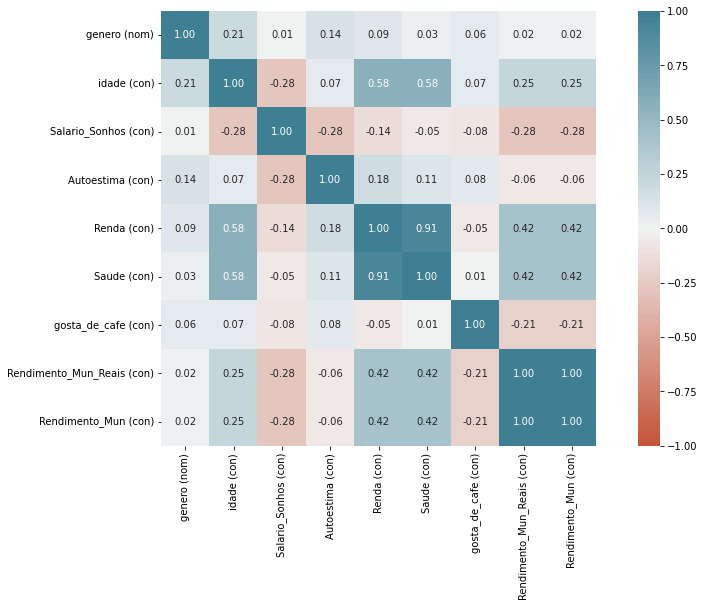

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f38878f0650>,
 'corr':                             genero (nom)  ...  Rendimento_Mun (con)
 genero (nom)                    1.000000  ...              0.019876
 idade (con)                     0.206980  ...              0.247798
 Salario_Sonhos (con)            0.005507  ...             -0.276711
 Autoestima (con)                0.135333  ...             -0.058588
 Renda (con)                     0.086602  ...              0.420328
 Saude (con)                     0.030851  ...              0.416086
 gosta_de_cafe (con)             0.063981  ...             -0.205210
 Rendimento_Mun_Reais (con)      0.019876  ...              1.000000
 Rendimento_Mun (con)            0.019876  ...              1.000000
 
 [9 rows x 9 columns]}

In [ ]:
from dython import nominal

nominal.associations(dataset_final, 
                     mark_columns=True, 
                     cmap=sns.diverging_palette(20, 220, n=200),
                     figsize=(15,8))

Indicativo de que renda tem relação direta com a percepção de saúde.

Text(0.5, 0, 'Renda Média do Estado dos Participantes - Afrodev (R$)')

<Figure size 432x288 with 0 Axes>

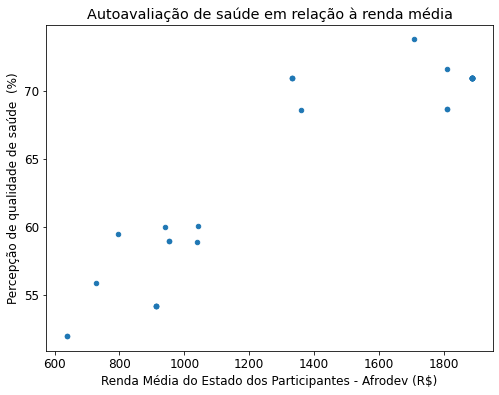

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
ax = dataset_final.plot.scatter("Renda", "Saude",
                                title="Autoavaliação de saúde em relação à renda média",
                                figsize=(8,6)) # Renda:  Reais - Proporção: Estadual (%)
ax.set_ylabel("Percepção de qualidade de saúde  (%)")
ax.set_xlabel("Renda Média do Estado dos Participantes - Afrodev (R$)")

Resultado importante!

Text(0.5, 0, 'Renda Média por Estados (R$)')

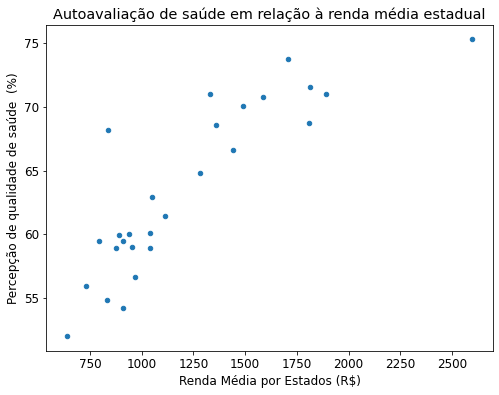

In [ ]:
ax = dados_obtidos.plot.scatter("Renda", "Saude",
                                title="Autoavaliação de saúde em relação à renda média estadual",
                                figsize=(8,6)) # Geral - Todos os dados dos estados
ax.set_ylabel("Percepção de qualidade de saúde  (%)")
ax.set_xlabel("Renda Média por Estados (R$)")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


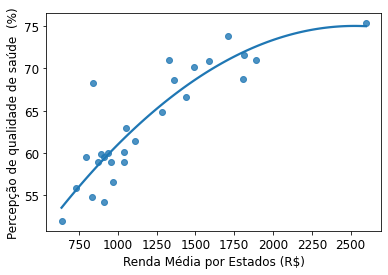

In [ ]:
from sklearn.linear_model import LinearRegression

X = dados_obtidos.iloc[:, 0].values.reshape(-1, 1)
Y = dados_obtidos.iloc[:, 1].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

ax = sns.regplot(X, Y, order=2, ci=None)
ax.set_ylabel("Percepção de qualidade de saúde (%)")
ax.set_xlabel("Renda Média por Estados (R$)")
plt.show()

In [ ]:
import statsmodels.api as sm

X = dataset_final["Renda"]
Y = dataset_final["Saude"]

mod = sm.OLS(Y, X)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Saude   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              342.2
Date:                Sat, 16 Oct 2021   Prob (F-statistic):                    1.74e-16
Time:                        14:18:08   Log-Likelihood:                         -114.74
No. Observations:                  27   AIC:                                      231.5
Df Residuals:                      26   BIC:                                      232.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
import statsmodels.api as sm

X = dados_obtidos["Renda"]
Y = dados_obtidos["Saude"]

mod = sm.OLS(Y, X)
res = mod.fit()
print(res.summary())